<a href="https://colab.research.google.com/github/madhurasharan/Sentimental-Analysis-on-movie-reviews/blob/main/Sentimental_analysis_on_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd

# Data loading and preprocessing

In [3]:
#load train data to the programming environment
train_data=pd.read_csv("train.csv")
train_data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [4]:
#shape of the of train_data
train_data.shape

(162758, 5)

In [5]:
#total number of NULL Values in the data
train_data.isnull().sum()  #how many null values are there in train_data

#so as a result , there are 6447 null values in feature "reviewText" of the tyrain_data set.

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0


# Loading Movie Data

In [7]:
import pandas as pd #for formation of data
#load train data to the programming environment
movie_data=pd.read_csv("movies.csv")
movie_data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN
143256,wonder_hermione_granger_hulk_v,Wonder Hermione Granger Hulk V,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Dwayne Clayton,NaN,NaN,NaN


In [8]:
#shape of the movie_data
movie_data.shape

(143258, 14)

# Removing duplicate values

In [9]:
movie_data.drop_duplicates(subset='movieid', inplace=True)
movie_data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN


In [10]:
movie_data.isnull().sum()

,0
movieid,0
title,0
audienceScore,62690
rating,114626
ratingContents,114626
releaseDateTheaters,100014
releaseDateStreaming,57131
runtimeMinutes,12494
genre,10003
originalLanguage,12384


# Merging Databases

In [11]:
data_df=pd.merge(train_data,movie_data,on='movieid',how='left')
data_df

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround


In [12]:
data_df.shape

(162758, 18)

In [13]:
data_df.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0
title,0
audienceScore,13248
rating,63724
ratingContents,63724
releaseDateTheaters,35834


# 1. Summaraize Data :

In [14]:
data_df.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [15]:
data_df.tail()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround
162757,james_t._kirk_phenomenal_zephyr_chronicles,Howard Evans,False,A peerless exercise in stimulus response.,POSITIVE,James T. Kirk Phenomenal Zephyr Chronicles,57.0,R,['Language'],2009-10-16,2009-12-29,86.0,"Horror, Mystery & thriller",English,Philip Stuck,$107.9M,Paramount Pictures,NaN


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [17]:
data_df.describe()

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


In [18]:
data_df

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround


# 2.Handling missing values


handling missing values to the process of dealing with data points or entities that are not available or are marked as "NaN" in the data set. Missing values can occur for various reasons, such as data collection errors, data corruption, or dat not beiong available for certain observatiopns

In [19]:
data_df.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0
title,0
audienceScore,13248
rating,63724
ratingContents,63724
releaseDateTheaters,35834


In [20]:
data_df.dtypes

,0
movieid,object
reviewerName,object
isFrequentReviewer,bool
reviewText,object
sentiment,object
title,object
audienceScore,float64
rating,object
ratingContents,object
releaseDateTheaters,object


In [21]:
data_df.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0
title,0
audienceScore,13248
rating,63724
ratingContents,63724
releaseDateTheaters,35834


In [22]:
data_df['audienceScore'] = data_df['audienceScore'].fillna(data_df['audienceScore'].mean())
data_df['runtimeMinutes'] = data_df['runtimeMinutes'].fillna(data_df['runtimeMinutes'].mean())

In [23]:
data_df.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0
title,0
audienceScore,0
rating,63724
ratingContents,63724
releaseDateTheaters,35834


# 2.Visualization

**Visualizing sentiment traget feature**

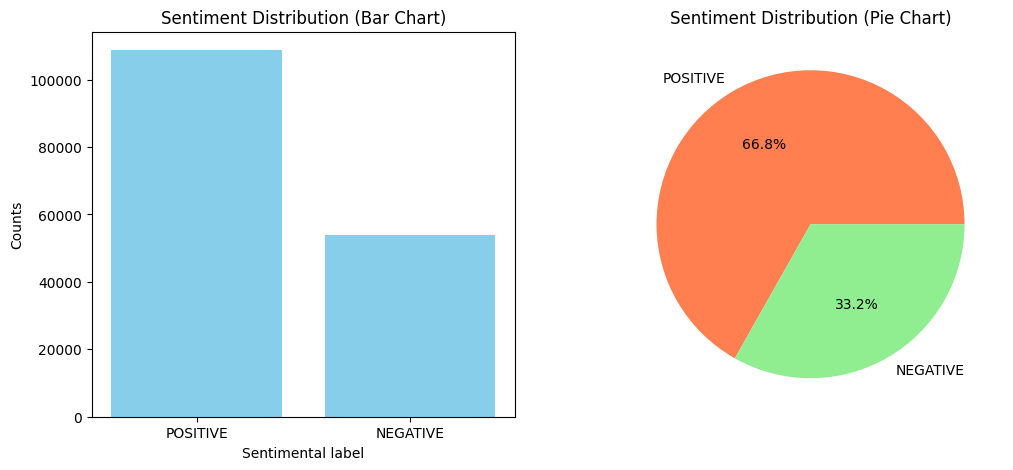

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into data_df
data_df = pd.read_csv('train.csv')  # Adjust the path to your CSV file

# Calculate sentiment counts
sentiment_counts = data_df['sentiment'].value_counts()
sentiments = sentiment_counts.index
counts = sentiment_counts.values

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
ax1.bar(sentiments, counts, color=['skyblue', 'skyblue'])
ax1.set_title('Sentiment Distribution (Bar Chart)')
ax1.set_xlabel('Sentimental label')
ax1.set_ylabel('Counts')

# Pie chart
ax2.pie(counts, labels=sentiments, autopct='%1.1f%%', colors=['coral', 'lightgreen'])
ax2.set_title('Sentiment Distribution (Pie Chart)')

plt.show()

In [26]:
import pandas as pd

# Load your data into data_df
data_df = pd.read_csv('movies.csv')  # Adjust the path to your CSV file

# Display the columns in the DataFrame
print(data_df.columns)

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')


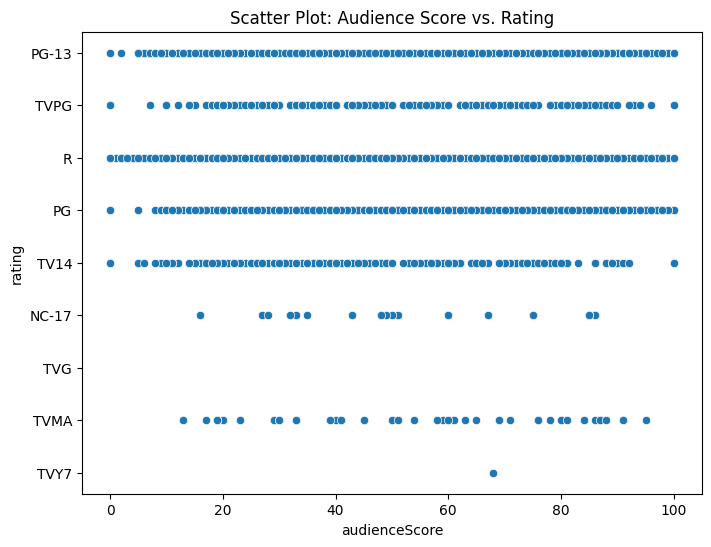

In [27]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Scatter plot: audienceScore vs. rating
plt.figure(figsize=(8, 6))
plt.title("Scatter Plot: Audience Score vs. Rating")
sns.scatterplot(data=data_df, x='audienceScore', y='rating')
# Show plot
plt.show()

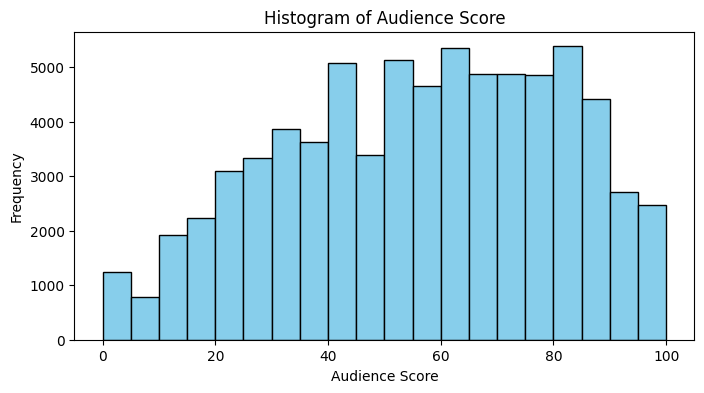

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(data_df['audienceScore'],bins=20,edgecolor='black',color='skyblue')
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.title('Histogram of Audience Score')
plt.show()

# Separate independent (review text) and dependent variable(Sentiment)

In [29]:
import pandas as pd

# Load your data into data_df
data_df = pd.read_csv('train.csv')  # Adjust the path to your CSV file

# Display the columns in the DataFrame
print(data_df.columns)

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')


In [30]:
# Separate independent (reviewText) and dependent variable (Sentiment)
X = data_df['reviewText']  # Independent variable
y = data_df['sentiment']   # Dependent variable

# Display the independent and dependent variables
print("Independent variable (X):")
print(X)
print("\nDependent variable (y):")
print(y)

Independent variable (X):
0         Henry Selick’s first movie since 2009’s Corali...
1         With a cast that reads like the Vogue Oscar pa...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but this is no Li...
4         Director Fernando Meirelles tells the story wi...
                                ...                        
162753    A top-notch thriller with genuine surprises an...
162754    Some people find Derek Zoolander funny and lik...
162755    This fun, gentle comedy focuses mainly on them...
162756    The film is rescued by a strong third act, but...
162757            A peerless exercise in stimulus response.
Name: reviewText, Length: 162758, dtype: object

Dependent variable (y):
0         POSITIVE
1         NEGATIVE
2         POSITIVE
3         POSITIVE
4         POSITIVE
            ...   
162753    POSITIVE
162754    NEGATIVE
162755    POSITIVE
162756    NEGATIVE
162757    POSITIVE
Name: sentiment, Length: 162758,

# Data Cleaning

In [31]:
#Tokenization
data_df['reviewText']=data_df['reviewText'].astype(str)
def tokenize_text(reviewText):
    return reviewText.split()
data_df['reviewText']=data_df['reviewText'].apply(tokenize_text)

In [32]:
#numerical values
import re
data_df['reviewText']=data_df['reviewText'].astype(str)
def remove_numerical_values(reviewText):
    return re.sub(r'\d+',' ',reviewText)
data_df['reviewText']=data_df['reviewText'].apply(remove_numerical_values)

In [33]:
#Remove Short words
def remove_short_words(reviewText,min_word_length=3):
    return re.sub(r'\b\w{1,'+ str(min_word_length-1)+r'}\b',' ',reviewText)
data_df['reviewText']=data_df['reviewText'].apply(remove_short_words)

In [34]:
# URL remove
def remove_urls(reviewText):
    return re.sub(r'&\S#\Shttp\S+|www\S+|https\S+', '', reviewText)
    # This part of the pattern matches URLs that might have special characters before

data_df['reviewText'] = data_df['reviewText'].apply(remove_urls)

In [35]:
def remove_special_chars1(reviewText):
    return re.sub(r'&#;&#;', '', reviewText)

# Function to remove special characters ' ' ' ' ' '
def remove_special_chars2(reviewText):
    return re.sub(r' ', ' ', reviewText)

def remove_empty_spaces(reviewText):
    return reviewText.strip(' ')

data_df['reviewText'] = data_df['reviewText'].apply(remove_special_chars1)
data_df['reviewText'] = data_df['reviewText'].apply(remove_special_chars2)
data_df['reviewText'] = data_df['reviewText'].apply(remove_empty_spaces)

# Pipeline

In [36]:
import re
import string
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def process_text(text):
    if isinstance(text, str):
        #lowercasing
        text = text.lower()
        #removing special characters and punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        #remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        #remove numerical values
        text = re.sub(r'\d+', '', text)
        #tokenization
        text = re.findall(r'\b\w+\b', text)
        #negation handling
        text = ['not_' + word if text[i - 1] == 'not' else word for i, word in enumerate(text)]
        #remove stop words
        text = [word for word in text if word not in ENGLISH_STOP_WORDS]
        return text
    else:
        return []

preprocessor = Pipeline([
    ('text_processing', FunctionTransformer(lambda x: x.apply(process_text)))
])

train_data['reviewText'] = preprocessor.fit_transform(train_data['reviewText'])
train_data['reviewText']

,reviewText
0,"[henry, selick, s, movie, s, coraline, fifth, ..."
1,"[cast, reads, like, vogue, oscar, party, guest..."
2,"[creed, ii, does, not_give, slightly, superior..."
3,"[know, youre, thinking, limitless, bradley, co..."
4,"[director, fernando, meirelles, tells, story, ..."
...,...
162753,"[topnotch, thriller, genuine, surprises, great..."
162754,"[people, derek, zoolander, funny, likable, end..."
162755,"[fun, gentle, comedy, focuses, mainly, themes,..."
162756,"[film, rescued, strong, act, getting, torture]"


**Removing duplicate values**

In [37]:
y=data_df['sentiment']
y

,sentiment
0,POSITIVE
1,NEGATIVE
2,POSITIVE
3,POSITIVE
4,POSITIVE
...,...
162753,POSITIVE
162754,NEGATIVE
162755,POSITIVE
162756,NEGATIVE


# Data Transformation

**TF-IDF(Term Frequency -Inverse Document Frequency)**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'reviewText' is a list of preprocessed tokens
train_data['reviewText'] = train_data['reviewText'].apply(lambda tokens: ' '.join(tokens))

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['reviewText'])

# Print the TF-IDF matrix or use it for further analysis
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1745673 stored elements and shape (162758, 90532)>

# Model Training

**Data splitting for model training and valuation**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3,random_state=42)

# 1.Logistic Regression Model

In [40]:
baseline_model = LogisticRegression(max_iter=1000)

# Hyperparameter tuning
param_grid = {'C': [0.1, 1]}
grid_search = GridSearchCV(baseline_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_
baseline_model.fit(X_train, y_train)

# Model evaluation
y_pred = baseline_model.predict(X_test)
print("Baseline Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Baseline Model:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.53      0.63     16201
    POSITIVE       0.80      0.92      0.85     32627

    accuracy                           0.79     48828
   macro avg       0.78      0.73      0.74     48828
weighted avg       0.79      0.79      0.78     48828

[[ 8598  7603]
 [ 2615 30012]]


# ROC and AUC

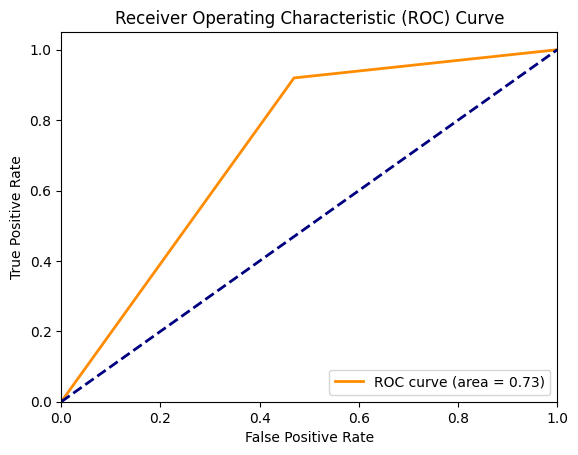

AUC Score: 0.7252798187961272


In [44]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)

# 2.Linear SVC Model

In [45]:
from sklearn.svm import LinearSVC

# LinearSVC with default hyperparameters
LinearSVC_model = LinearSVC()

# Hyperparameter tuning using GridSearchCV for LinearSVC
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LinearSVC_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
linear_model = grid_search.best_estimator_

# Model evaluation for LinearSVC
y_pred = linear_model.predict(X_test)
print("LinearSVC Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LinearSVC Model:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.52      0.62     16201
    POSITIVE       0.79      0.92      0.85     32627

    accuracy                           0.79     48828
   macro avg       0.78      0.72      0.74     48828
weighted avg       0.79      0.79      0.78     48828

[[ 8418  7783]
 [ 2455 30172]]


# 3.MultinomailNB Model

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB  # Add this import

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Hyperparameter tuning
param_grid = {
    'alpha': [0.1, 1.0, 2.0]
}

grid_search = GridSearchCV(mnb_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

mnb_model = grid_search.best_estimator_

# Model evaluation
y_pred = mnb_model.predict(X_test) # Evaluate on a smaller sample
print("Multinomial Naive Bayes Model:")
print(classification_report(y_test, y_pred))

cnf = confusion_matrix(y_test, y_pred)
print(cnf)

Multinomial Naive Bayes Model:
              precision    recall  f1-score   support

    NEGATIVE       0.75      0.47      0.58     16201
    POSITIVE       0.78      0.92      0.84     32627

    accuracy                           0.77     48828
   macro avg       0.76      0.69      0.71     48828
weighted avg       0.77      0.77      0.75     48828

[[ 7578  8623]
 [ 2541 30086]]
